In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import joblib
import math
import numpy as np
from itertools import product
from collections import Counter
import garpar as gp
import re
import warnings

In [71]:
mer = joblib.load("./price_01-01-2010_to_01-10-2025.pklj")
mer= mer[3408:3808]
mer = mer.drop(columns=['BRIO', 'BRIO6','EDLH','EMDE','ESME','INAG','IRCP','PGR'])
mer = mer.ffill().apply(pd.to_numeric, errors='coerce')
mer = mer.infer_objects(copy=False)
pd.set_option('future.no_silent_downcasting', True)
mer

,ALUA,BBAR,BMA,BYMA,CEPU,COME,CRES,CVH,EDN,GGAL,...,MORI,MTR,OEST,PATA,POLL,RICH,RIGO,SAMI,SEMI,TGLT
2023-12-11,1119.0,1875.70,2772.75,891.00,909.50,69.40,947.20,3383.0,926.55,1756.35,...,85.4,1151.0,789.5,766.0,89.0,768.0,803.5,891.5,95.90,16.70
2023-12-12,1115.5,1855.80,2713.80,943.00,976.70,70.35,1020.25,3541.5,1038.00,1780.85,...,87.5,1246.0,773.5,789.5,90.0,779.5,803.5,978.5,99.70,17.85
2023-12-13,1044.5,1888.65,2836.05,881.50,1004.30,70.65,1021.60,3575.5,1041.85,1827.30,...,87.1,1326.5,747.0,800.0,99.0,757.5,803.5,948.5,96.20,17.55
2023-12-14,1033.0,1859.10,2857.50,863.50,1026.35,69.95,1016.10,3488.5,1025.00,1788.85,...,85.8,1397.5,725.0,763.5,99.0,740.0,803.5,918.5,91.40,17.15
2023-12-15,923.0,1706.45,2696.75,825.50,926.00,67.50,964.65,3405.0,963.65,1652.50,...,81.7,1379.5,717.5,744.0,96.0,731.0,805.5,861.5,87.70,16.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-07-25,715.0,6850.00,9190.00,193.50,1570.00,116.00,1465.00,6780.0,1715.00,6650.00,...,212.0,2475.0,684.0,1285.0,325.0,1370.0,640.0,630.0,24.95,19.20
2025-07-28,709.0,6820.00,9140.00,195.00,1590.00,126.00,1515.00,6900.0,1845.00,6620.00,...,232.0,2500.0,696.0,1290.0,325.0,1405.0,672.0,643.0,25.50,19.45
2025-07-29,723.0,7130.00,9450.00,201.00,1655.00,137.50,1555.00,7060.0,1930.00,6830.00,...,232.0,2550.0,704.0,1280.0,325.0,1500.0,678.0,650.0,25.85,20.30
2025-07-30,750.0,7190.00,9400.00,203.75,1650.00,134.75,1525.00,6930.0,1900.00,6850.00,...,228.5,2565.0,719.0,1275.0,325.0,1535.0,680.0,630.0,25.60,20.75


In [72]:
# mervalf = gp.datasets.load_MERVAL(    first="07-29-2021", last = "07-29-2022")
#rend19m  # desde 11/12/23 al31/07/25
#rend12m # desde 01/08/24 al 31/07/25
#rend9m= # desde 01/11/24 al 31/07/25
#rend6m=  # desde el 01/02/25 al 31/07/25  ------- 03/02 primer día hábil
#rend3m=  # desde el 01/05/25 al 31/07/25 ---------05/05 día hábil
base19 = gp.StocksSet.from_prices(
        mer,
        weights=None,
        title="2025Merval19m",
        description=("Argentine stock market prices") )
base12 = gp.StocksSet.from_prices(
        mer[155:],
        weights=None,
        title="2025Merval12m",
        description=("Argentine stock market prices") )
base9 = gp.StocksSet.from_prices(
        mer[220:],
        weights=None,
        title="2025Merval9m",
        description=("Argentine stock market prices") )
base6 = gp.StocksSet.from_prices(
        mer[282:],
        weights=None,
        title="2025Merval6m",
        description=("Argentine stock market prices") )
base3 = gp.StocksSet.from_prices(
        mer[339:],
        weights=None,
        title="2025Merval3m",
        description=("Argentine stock market prices") )


In [73]:
ms = gp.optimize.mean_variance.MVOptimizer( model='max_sharpe')
sharpe19 = ms.optimize(base19)
sharpe12 = ms.optimize(base12)
sharpe9 = ms.optimize(base9)
sharpe6 = ms.optimize(base6)
sharpe3 = ms.optimize(base3)

/home/nadia/indicador/lib/python3.10/site-packages/pypfopt/expected_returns.py:32: UserWarning: Some returns are NaN. Please check your price data.
  warnings.warn(
/home/nadia/indicador/lib/python3.10/site-packages/garpar/optimize/mean_variance.py:259: UserWarning: No risk_free_rate specified, coercing it
  warnings.warn("No risk_free_rate specified, coercing it")
/home/nadia/indicador/lib/python3.10/site-packages/pypfopt/expected_returns.py:32: UserWarning: Some returns are NaN. Please check your price data.
  warnings.warn(
/home/nadia/indicador/lib/python3.10/site-packages/garpar/optimize/mean_variance.py:259: UserWarning: No risk_free_rate specified, coercing it
  warnings.warn("No risk_free_rate specified, coercing it")
/home/nadia/indicador/lib/python3.10/site-packages/garpar/optimize/mean_variance.py:259: UserWarning: No risk_free_rate specified, coercing it
  warnings.warn("No risk_free_rate specified, coercing it")
/home/nadia/indicador/lib/python3.10/site-packages/garpar/opt

In [74]:
wsharpe19 = sharpe19.weights_prune().weights.to_frame()
wsharpe19.rename(columns={'Weights': 'Weights Sharpe 19'}, inplace=True)
wsharpe12 = sharpe12.weights_prune().weights.to_frame()
wsharpe12.rename(columns={'Weights': 'Weights Sharpe 12'}, inplace=True)
wsharpe9 = sharpe9.weights_prune().weights.to_frame()
wsharpe9.rename(columns={'Weights': 'Weights Sharpe 9'}, inplace=True)
wsharpe6 = sharpe6.weights_prune().weights.to_frame()
wsharpe6.rename(columns={'Weights': 'Weights Sharpe 6'}, inplace=True)
wsharpe3 = sharpe3.weights_prune().weights_prune().weights.to_frame()
wsharpe3.rename(columns={'Weights': 'Weights Sharpe 3'}, inplace=True)

In [75]:
wsharpe = pd.concat([wsharpe19, wsharpe12, wsharpe9, wsharpe6, wsharpe3], axis=1)
wsharpe = wsharpe.fillna(0)
wsharpe

,Weights Sharpe 19,Weights Sharpe 12,Weights Sharpe 9,Weights Sharpe 6,Weights Sharpe 3
Stocks,,,,,
GGAL,0.081236,0.000000,0.000000,0.000000,0.000000
BHIP,0.333599,0.000000,0.000000,0.000000,0.000000
BPAT,0.042476,0.000000,0.000000,0.000000,0.000000
GCLA,0.145462,0.077699,0.000000,0.000000,0.000000
GRIM,0.155075,0.183326,0.459821,0.443693,0.396554
POLL,0.242151,0.000000,0.000000,0.073017,0.000000
LOMA,0.000000,0.193768,0.022059,0.000000,0.000000
DYCA,0.000000,0.232692,0.000000,0.000000,0.000000
METR,0.000000,0.267079,0.000000,0.000000,0.000000


In [76]:
mk = gp.optimize.mean_variance.Markowitz(target_return=0.01)
marko19_mean= mk.optimize(base19)
marko12_mean= mk.optimize(base12)
marko9_mean= mk.optimize(base9)
marko6_mean= mk.optimize(base6)
marko3_mean= mk.optimize(base3)


/home/nadia/indicador/lib/python3.10/site-packages/pypfopt/expected_returns.py:32: UserWarning: Some returns are NaN. Please check your price data.
  warnings.warn(


In [77]:
wmarko19_mean = marko19_mean.weights_prune().weights.to_frame()
wmarko19_mean.rename(columns={'Weights': 'Weights Mark(r) 19'}, inplace=True)
wmarko12_mean = marko12_mean.weights_prune().weights.to_frame()
wmarko12_mean.rename(columns={'Weights': 'Weights Mark(r) 12'}, inplace=True)
wmarko9_mean = marko9_mean.weights_prune().weights.to_frame()
wmarko9_mean.rename(columns={'Weights': 'Weights Mark(r) 9'}, inplace=True)
wmarko6_mean = marko6_mean.weights_prune().weights.to_frame()
wmarko6_mean.rename(columns={'Weights': 'Weights Mark(r) 6'}, inplace=True)
wmarko3_mean = marko3_mean.weights_prune().weights.to_frame()
wmarko3_mean.rename(columns={'Weights': 'Weights Mark(r) 3'}, inplace=True)

In [78]:
wmarko_mean = pd.concat([wmarko19_mean, wmarko12_mean, wmarko9_mean, wmarko6_mean, wmarko3_mean], axis=1)
wmarko_mean = wmarko_mean.fillna(0)
wmarko_mean

,Weights Mark(r) 19,Weights Mark(r) 12,Weights Mark(r) 9,Weights Mark(r) 6,Weights Mark(r) 3
Stocks,,,,,
BYMA,0.008687,0.003986,0.010109,0.013777,0.000000
MIRG,0.079200,0.093866,0.080045,0.056792,0.111615
VALO,0.147508,0.035313,0.018007,0.000000,0.000000
CADO,0.157640,0.238964,0.259614,0.215620,0.319732
GAMI,0.008845,0.132133,0.128368,0.169829,0.094659
GARO,0.040335,0.016092,0.009594,0.000000,0.000000
GCLA,0.058200,0.038588,0.033422,0.043990,0.096442
GRIM,0.109231,0.067421,0.059001,0.049329,0.000000
HAVA,0.008408,0.018339,0.017965,0.020093,0.014118


In [79]:
mk = gp.optimize.mean_variance.Markowitz(target_risk=0.30)
marko19_risk= mk.optimize(base19)
marko12_risk= mk.optimize(base12)
marko9_risk= mk.optimize(base9)
marko6_risk= mk.optimize(base6)
marko3_risk= mk.optimize(base3)


/home/nadia/indicador/lib/python3.10/site-packages/pypfopt/expected_returns.py:32: UserWarning: Some returns are NaN. Please check your price data.
  warnings.warn(


In [80]:
wmarko19_risk = marko19_risk.weights_prune().weights.to_frame()
wmarko19_risk.rename(columns={'Weights': 'Weights Mark(riesgo) 19'}, inplace=True)
wmarko12_risk = marko12_risk.weights_prune().weights.to_frame()
wmarko12_risk.rename(columns={'Weights': 'Weights Mark(riesgo) 12'}, inplace=True)
wmarko9_risk = marko9_risk.weights_prune().weights.to_frame()
wmarko9_risk.rename(columns={'Weights': 'Weights Mark(riesgo) 9'}, inplace=True)
wmarko6_risk = marko6_risk.weights_prune().weights.to_frame()
wmarko6_risk.rename(columns={'Weights': 'Weights Mark(riesgo) 6'}, inplace=True)
wmarko3_risk = marko3_risk.weights_prune().weights.to_frame()
wmarko3_risk.rename(columns={'Weights': 'Weights Mark(riesgo) 3'}, inplace=True)


In [81]:
wmarko_risk = pd.concat([wmarko19_risk, wmarko12_risk, wmarko9_risk, wmarko6_risk, wmarko3_risk], axis=1)
wmarko_risk = wmarko_risk.fillna(0).round(6)
wmarko_risk


,Weights Mark(riesgo) 19,Weights Mark(riesgo) 12,Weights Mark(riesgo) 9,Weights Mark(riesgo) 6,Weights Mark(riesgo) 3
Stocks,,,,,
GGAL,0.072130,0.000000,0.000000,0.000000,0.000000
MIRG,0.019704,0.017570,0.000000,0.000000,0.000000
BHIP,0.141658,0.000000,0.000000,0.000000,0.000000
BPAT,0.040012,0.000000,0.000000,0.000000,0.000000
GARO,0.024708,0.000000,0.052704,0.000000,0.000000
GCLA,0.178253,0.148897,0.000000,0.000000,0.000000
GRIM,0.203619,0.203189,0.395785,0.388565,0.424505
INTR,0.038545,0.000000,0.000000,0.000000,0.000000
MTR,0.043856,0.069619,0.000000,0.000000,0.000000


In [82]:
# === Bases igual que antes ===
rmeanbase19 = base19.as_returns().mean().to_frame()
rvariance19 = base19.as_returns().std().to_frame() * base12.as_returns().std().to_frame()
mvbase19 = pd.concat([rmeanbase19, rvariance19], axis=1)

rmeanbase12 = base12.as_returns().mean().to_frame()
rvariance12 = base12.as_returns().std().to_frame() * base12.as_returns().std().to_frame()
mvbase12 = pd.concat([rmeanbase12, rvariance12], axis=1)

rmeanbase9 = base9.as_returns().mean().to_frame()
rvariance9 = base9.as_returns().std().to_frame() * base9.as_returns().std().to_frame()
mvbase9 = pd.concat([rmeanbase9, rvariance9], axis=1)

rmeanbase6 = base6.as_returns().mean().to_frame()
rvariance6 = base6.as_returns().std().to_frame() * base6.as_returns().std().to_frame()
mvbase6 = pd.concat([rmeanbase6, rvariance6], axis=1)

rmeanbase3 = base3.as_returns().mean().to_frame()
rvariance3 = base3.as_returns().std().to_frame() * base3.as_returns().std().to_frame()
mvbase3 = pd.concat([rmeanbase3, rvariance3], axis=1)

In [87]:
warnings.filterwarnings('ignore')
resultados_mean = {}  # acá se guardarán todos los dataframes

# valores de target_return desde 0.004 hasta 0.103 (100 valores)
retornos = [0.002 * i for i in range(1, 100)]

for i, tr in enumerate(retornos, start=1):

    mk = gp.optimize.mean_variance.Markowitz(target_return=tr)

    # optimización para cada horizonte temporal
    marko19 = mk.optimize(base19)
    marko12 = mk.optimize(base12)
    marko9  = mk.optimize(base9)
    marko6  = mk.optimize(base6)
    marko3  = mk.optimize(base3)

    # convertir a DataFrame igual que en tu ejecución manual
    w19 = marko19.weights_prune().weights.to_frame()
    w19.rename(columns={'Weights': f'Weights Mark(r) 19'}, inplace=True)
    
    w12 = marko12.weights_prune().weights.to_frame()
    w12.rename(columns={'Weights': f'Weights Mark(r) 12'}, inplace=True)

    w9  = marko9.weights_prune().weights.to_frame()
    w9.rename(columns={'Weights': f'Weights Mark(r) 9'}, inplace=True)

    w6  = marko6.weights_prune().weights.to_frame()
    w6.rename(columns={'Weights': f'Weights Mark(r) 6'}, inplace=True)

    w3  = marko3.weights_prune().weights.to_frame()
    w3.rename(columns={'Weights': f'Weights Mark(r) 3'}, inplace=True)

    # concatenar como hacías vos
    df = pd.concat([w19, w12, w9, w6, w3], axis=1).fillna(0)

    # guardar con el nombre solicitado
    resultados_mean[f"wmarko_mean{i}"] = df

# ejemplo: ver wmarko_mean4
resultados_mean;

In [88]:
warnings.filterwarnings('ignore')

resultados_risk = {}  # acá se guardarán todos los dataframes

# valores de target_risk: desde 0.003 hasta 0.300 (100 valores)
riesgos = [0.22 + i/100 for i in range(0, 99)]

for i, trisk in enumerate(riesgos, start=1):

    # Se usa target_risk en lugar de target_return
    mkr = gp.optimize.mean_variance.Markowitz(target_risk=trisk)

    # optimización para cada horizonte temporal
    marko19r = mkr.optimize(base19)
    marko12r = mkr.optimize(base12)
    marko9r  = mkr.optimize(base9)
    marko6r  = mkr.optimize(base6)
    marko3r  = mkr.optimize(base3)
    
    # convertir a DataFrame igual que en tu ejecución manual (usando get_weights)
    w19 = marko19r.weights_prune().weights.to_frame()
    w19.rename(columns={'Weights': f'Weights Mark(risk) 19'}, inplace=True)
    
    w12 = marko12r.weights_prune().weights.to_frame()
    w12.rename(columns={'Weights': f'Weights Mark(risk) 12'}, inplace=True)

    w9  = marko9r.weights_prune().weights.to_frame()
    w9.rename(columns={'Weights': f'Weights Mark(risk) 9'}, inplace=True)

    w6  = marko6r.weights_prune().weights.to_frame()
    w6.rename(columns={'Weights': f'Weights Mark(risk) 6'}, inplace=True)

    w3  = marko3r.weights_prune().weights.to_frame()
    w3.rename(columns={'Weights': f'Weights Mark(risk) 3'}, inplace=True)

    # concatenar como hacías vos
    df = pd.concat([w12, w9, w6, w3], axis=1).fillna(0)

    # guardar con el nombre solicitado
    resultados_risk[f"wmarko_risk{i}"] = df

resultados_risk;

In [89]:
for i in range(1, 100):
    variable_name = f"wmarko_mean{i}"
    key_name = f"wmarko_mean{i}"
    
    # CAMBIO: Ahora resultados_mean[key_name] sí existe
    globals()[variable_name] = resultados_mean[key_name]

In [90]:
for i in range(1, 100):
    variable_name = f"wmarko_risk{i}"
    key_name = f"wmarko_risk{i}"
    
    # Asigna el valor (el DataFrame) a la variable con el nombre dinámico
    globals()[variable_name] = resultados_risk[key_name]

In [91]:
dfs_por_corrida = {}

for nombre, df in resultados_mean.items():
    # aseguramos orden consistente de columnas
    df_ordenado = df[
        ["Weights Mark(r) 19", "Weights Mark(r) 12", "Weights Mark(r) 9",
         "Weights Mark(r) 6", "Weights Mark(r) 3"]
    ].copy()
    
    # guardar dataframe con el mismo nombre
    dfs_por_corrida[nombre] = df_ordenado

In [92]:
dfs_por_corrida_risk = {}

for nombre, df in resultados_risk.items():
    # aseguramos orden consistente de columnas
    df_ordenado = df[
        ["Weights Mark(risk) 12", "Weights Mark(risk) 9",
         "Weights Mark(risk) 6", "Weights Mark(risk) 3"]
    ].copy()
    
    # guardar dataframe con el mismo nombre
    dfs_por_corrida_risk[nombre] = df_ordenado

In [94]:
    
# === Diccionario de dataframes base ===
bases_dict = {
    "19": mvbase19,
    "12": mvbase12,
    "9": mvbase9,
    "6": mvbase6,
    "3": mvbase3
}

resultados = []

for nombre_pesos, df_pesos in df_pesos_dict.items():

    for col_peso in df_pesos.columns:

        # === Extraer el número (12, 9, 6, 3) desde el nombre de la columna ===
        match = re.search(r"(\d+)", col_peso)
        if not match:
            continue  # si no hay número, se saltea

        numero = match.group(1)

        # === Seleccionar la base que corresponde al número ===
        if numero not in bases_dict:
            continue  # si el número no coincide con bases disponibles

        base_df = bases_dict[numero]
        pesos = df_pesos[col_peso]

        # === Calcular media y varianza ===
        media = (pesos * base_df.iloc[:, 0]).sum()
        varianza = (pesos**2 * base_df.iloc[:, 1]).sum()

        resultados.append([
            nombre_pesos,   # df de pesos
            col_peso,       # columna de pesos
            f"mvbase{numero}",# base emparejada
            media,
            varianza
        ])

df_resultados = pd.DataFrame(
    resultados,
    columns=["DF_Pesos", "Col_Pesos", "DF_Base", "Media", "Varianza"]
)

df_resultados


,DF_Pesos,Col_Pesos,DF_Base,Media,Varianza
0,wmarko_risk,Weights Mark(riesgo) 19,mvbase19,0.003739,0.000171
1,wmarko_risk,Weights Mark(riesgo) 12,mvbase12,0.002976,0.000188
2,wmarko_risk,Weights Mark(riesgo) 9,mvbase9,0.003221,0.000305
3,wmarko_risk,Weights Mark(riesgo) 6,mvbase6,0.002942,0.000339
4,wmarko_risk,Weights Mark(riesgo) 3,mvbase3,0.008119,0.000365
5,wsharpe,Weights Sharpe 19,mvbase19,0.004185,0.000288
6,wsharpe,Weights Sharpe 12,mvbase12,0.003574,0.000338
7,wsharpe,Weights Sharpe 9,mvbase9,0.003385,0.000359
8,wsharpe,Weights Sharpe 6,mvbase6,0.003344,0.000425
9,wsharpe,Weights Sharpe 3,mvbase3,0.007748,0.000325


In [95]:
df_pesos_dict = resultados_risk 


bases_dict = {  
    "19": mvbase19,
    "12": mvbase12,
    "9": mvbase9,
    "6": mvbase6,
    "3": mvbase3
}

resultados = []

for nombre_pesos, df_pesos in df_pesos_dict.items():

    # Verificamos si es un DataFrame de riesgo para el nombre de la columna esperado
    if "wmarko_risk" in nombre_pesos:
        # Se asume que las columnas son 'Weights Mark(risk) X'
        pass
    else:
        # Si tienes DataFrames con otros nombres, puedes filtrarlos o ajustar la lógica
        continue 

    for col_peso in df_pesos.columns:

        # === Extraer el número (12, 9, 6, 3) desde el nombre de la columna ===
        # El regex sigue funcionando, ya que busca el número en "Weights Mark(risk) 12"
        match = re.search(r"(\d+)", col_peso)
        if not match:
            continue  # si no hay número, se saltea

        numero = match.group(1)

        # === Seleccionar la base que corresponde al número ===
        if numero not in bases_dict:
            continue  # si el número no coincide con bases disponibles

        base_df = bases_dict[numero]
        pesos = df_pesos[col_peso]

        # Asegurarse que los pesos están alineados con los índices de la base
        # Esto es crucial para la multiplicación
        pesos_alineados = pesos.reindex(base_df.index).fillna(0)
        
        # === Calcular media y varianza ===
        # Media: Sumatoria (Peso_i * Media_i)
        media = (pesos_alineados * base_df.iloc[:, 0]).sum()
        
        # Varianza: Sumatoria (Peso_i^2 * Varianza_i) 
        # NOTA: Tu fórmula de varianza está incompleta, ya que solo considera 
        # la varianza individual (diagonal de la matriz de covarianza). 
        # La varianza correcta de un portafolio es W^T * Cov * W.
        # Si mvbaseN.iloc[:, 1] es la varianza individual (diagonal), mantenemos tu fórmula:
        varianza_simplificada = (pesos_alineados**2 * base_df.iloc[:, 1]).sum()

        resultados.append([
            nombre_pesos,       # df de pesos (e.g., wmarko_risk1)
            col_peso,           # columna de pesos (e.g., Weights Mark(risk) 12)
            f"mvbase{numero}",  # base emparejada (e.g., mvbase12)
            media,
            varianza_simplificada
        ])

df_resultados_risk = pd.DataFrame(
    resultados,
    columns=["DF_Pesos", "Col_Pesos", "DF_Base", "Media", "Varianza"]
)

df_resultados_risk

,DF_Pesos,Col_Pesos,DF_Base,Media,Varianza
0,wmarko_risk1,Weights Mark(risk) 12,mvbase12,0.001886,0.000093
1,wmarko_risk1,Weights Mark(risk) 9,mvbase9,0.001982,0.000137
2,wmarko_risk1,Weights Mark(risk) 6,mvbase6,0.001844,0.000176
3,wmarko_risk1,Weights Mark(risk) 3,mvbase3,0.006347,0.000205
4,wmarko_risk2,Weights Mark(risk) 12,mvbase12,0.002056,0.000102
...,...,...,...,...,...
391,wmarko_risk98,Weights Mark(risk) 3,mvbase3,0.011715,0.001639
392,wmarko_risk99,Weights Mark(risk) 12,mvbase12,0.004490,0.001849
393,wmarko_risk99,Weights Mark(risk) 9,mvbase9,0.004669,0.001346
394,wmarko_risk99,Weights Mark(risk) 6,mvbase6,0.005961,0.001764


In [96]:
df_resultadosf = pd.concat([df_resultados, df_resultados_risk], ignore_index=True)
df_resultadosf['Desvío'] = df_resultadosf['Varianza'] ** 0.5
df_resultadosf

,DF_Pesos,Col_Pesos,DF_Base,Media,Varianza,Desvío
0,wmarko_risk,Weights Mark(riesgo) 19,mvbase19,0.003739,0.000171,0.013063
1,wmarko_risk,Weights Mark(riesgo) 12,mvbase12,0.002976,0.000188,0.013722
2,wmarko_risk,Weights Mark(riesgo) 9,mvbase9,0.003221,0.000305,0.017474
3,wmarko_risk,Weights Mark(riesgo) 6,mvbase6,0.002942,0.000339,0.018424
4,wmarko_risk,Weights Mark(riesgo) 3,mvbase3,0.008119,0.000365,0.019107
...,...,...,...,...,...,...
406,wmarko_risk98,Weights Mark(risk) 3,mvbase3,0.011715,0.001639,0.040490
407,wmarko_risk99,Weights Mark(risk) 12,mvbase12,0.004490,0.001849,0.043000
408,wmarko_risk99,Weights Mark(risk) 9,mvbase9,0.004669,0.001346,0.036692
409,wmarko_risk99,Weights Mark(risk) 6,mvbase6,0.005961,0.001764,0.041996


<Axes: title={'center': '3 meses \n '}, xlabel='Desvío', ylabel='Media'>

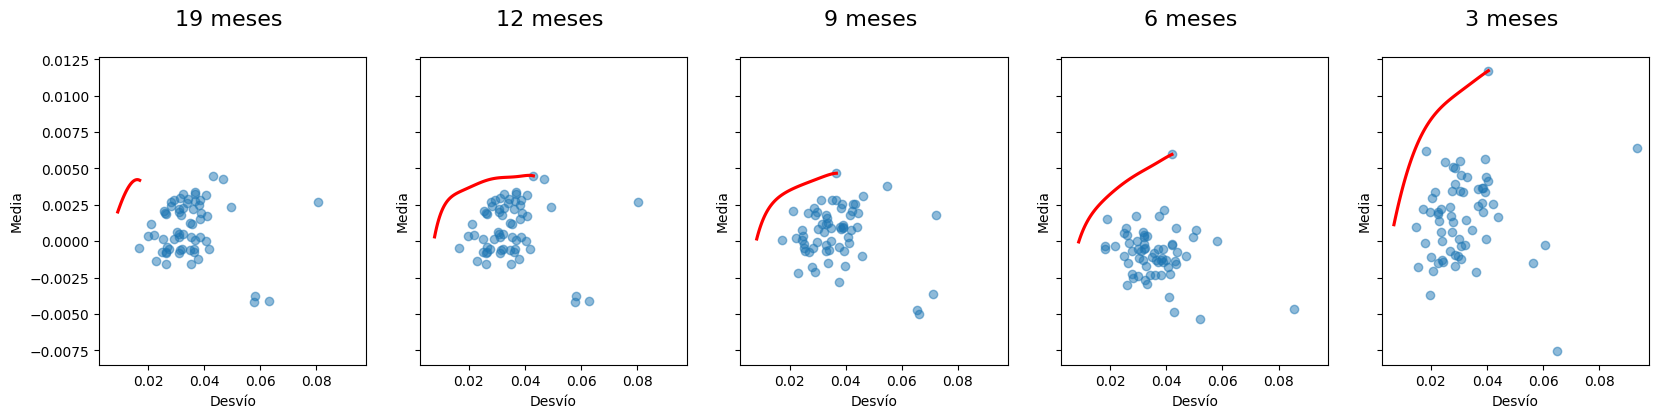

In [108]:
# Diagramas de dispersion con envolvente carteras


fig, ax = plt.subplots(1, 5, sharey=True, sharex=True)
fig.set_size_inches(20, 4)
#19 meses
y19 = np.array(base19.as_returns().mean().to_frame())
x19 = np.array(base19.as_returns().std().to_frame())
ax[0].scatter(x12, y12,  alpha = 0.5)
ax[0].set_title(f"19 meses \n ", fontsize=16)
ax[0].set_xlabel("Desvío")
ax[0].set_ylabel("Media")
yc19 = df_resultadosf[df_resultadosf["DF_Base"].str.contains('mvbase19')]["Media"]
xc19 = df_resultadosf[df_resultadosf["DF_Base"].str.contains('mvbase19')]["Desvío"]
sns.regplot(x=xc19, y=yc19, ax=ax[0],order=3, ci=None, color='red', label="Envolvente", scatter=False)
#ax[0].scatter(xc19, yc19)


#12 meses
y12 = np.array(base12.as_returns().mean().to_frame())
x12 = np.array(base12.as_returns().std().to_frame())
ax[1].scatter(x12, y12,  alpha = 0.5)
ax[1].set_title(f"12 meses \n ", fontsize=16)
ax[1].set_xlabel("Desvío")
ax[1].set_ylabel("Media")
yc12 = df_resultadosf[df_resultadosf["DF_Base"].str.contains('mvbase12')]["Media"]
xc12 = df_resultadosf[df_resultadosf["DF_Base"].str.contains('mvbase12')]["Desvío"]
sns.regplot(x=xc12, y=yc12, ax=ax[1],order=6, ci=None, color='red', label="Envolvente", scatter=False)

#ax[1].scatter(xc12, yc12)

#9 meses
y9 = np.array(base9.as_returns().mean().to_frame())
x9 = np.array(base9.as_returns().std().to_frame())
ax[2].scatter(x9, y9,  alpha = 0.5)
ax[2].set_title(f"9 meses \n ", fontsize=16)
ax[2].set_xlabel("Desvío")
ax[2].set_ylabel("Media")
yc9 = df_resultadosf[df_resultadosf["DF_Base"].str.contains('mvbase9')]["Media"]
xc9 = df_resultadosf[df_resultadosf["DF_Base"].str.contains('mvbase9')]["Desvío"]
sns.regplot(x=xc9, y=yc9, ax=ax[2],order=6, ci=None, color='red', label="Envolvente", scatter=False)
#ax[2].scatter(xc9, yc9)


#6 meses
y6 = np.array(base6.as_returns().mean().to_frame())
x6 = np.array(base6.as_returns().std().to_frame())
ax[3].scatter(x6, y6,  alpha = 0.5)
ax[3].set_title(f"6 meses \n ", fontsize=16)
ax[3].set_xlabel("Desvío")
ax[3].set_ylabel("Media")
yc6 = df_resultadosf[df_resultadosf["DF_Base"].str.contains('mvbase6')]["Media"]
xc6 = df_resultadosf[df_resultadosf["DF_Base"].str.contains('mvbase6')]["Desvío"]
sns.regplot(x=xc6, y=yc6, ax=ax[3],order=6, ci=None, color='red', label="Envolvente", scatter=False)
#ax[3].scatter(xc6, yc6)


#9 meses
y3 = np.array(base3.as_returns().mean().to_frame())
x3 = np.array(base3.as_returns().std().to_frame())
ax[4].scatter(x3, y3,  alpha = 0.5)
ax[4].set_title(f"3 meses \n ", fontsize=16)
ax[4].set_xlabel("Desvío")
ax[4].set_ylabel("Media")
yc3 = df_resultadosf[df_resultadosf["DF_Base"].str.contains('mvbase3')]["Media"]
xc3 = df_resultadosf[df_resultadosf["DF_Base"].str.contains('mvbase3')]["Desvío"]
sns.regplot(x=xc3, y=yc3, ax=ax[4],order=6, ci=None, color='red', label="Envolvente", scatter=False)
#ax[4].scatter(xc3, yc3, color='red')

# plt.show()

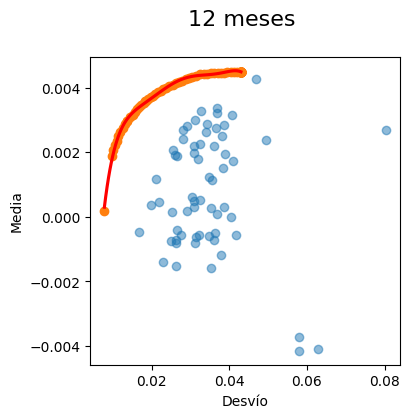

In [101]:
# Diagramas de dispersion con envolvente carteras


fig, ax = plt.subplots(1, 1, sharey=True, sharex=True)
fig.set_size_inches(4, 4)


#12 meses
y12 = np.array(base12.as_returns().mean().to_frame())
x12 = np.array(base12.as_returns().std().to_frame())
ax.scatter(x12, y12,  alpha = 0.5)
ax.set_title(f"12 meses \n ", fontsize=16)
ax.set_xlabel("Desvío")
ax.set_ylabel("Media")
yc12 = df_resultadosf[df_resultadosf["DF_Base"].str.contains('mvbase12')]["Media"]
xc12 = df_resultadosf[df_resultadosf["DF_Base"].str.contains('mvbase12')]["Desvío"]
sns.regplot(x=xc12, y=yc12, ax=ax,order=6, ci=None, color='red', label="Envolvente", scatter=False)
ax.scatter(xc12, yc12)

# plt.show()